## Final Project : Classification
Let's start by importing the libraries that we will be using.

In [1]:
# importing libraries
import pandas as pd                    # For reading csv files
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
import seaborn as sns                   # For plotting graphs 
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Let's check the features present in our datasets.

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that 'subscribed' is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [5]:
# shape of datasets
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Train shape: (31647, 18)
Test shape: (13564, 17)


We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. 
We will predict the subscribed with the help of model built using the train data.
Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [6]:
# Print data types for each variable
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

We can see there are two format of data types:

1. object: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. int64: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [8]:
#printing first five rows of the train dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [9]:
# printing first five rows of the test dataset
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


## Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [10]:
# print count of subscribed
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [11]:
#  print percentage of subscribed variables as yes and no 
train['subscribed'].value_counts()/len(train['subscribed'])

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

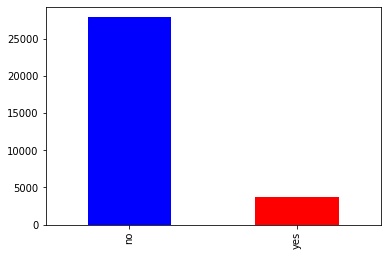

In [12]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar(color = ['blue','red'])
plt.show()

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look  at the distribution of age variable to see how many people belongs to a particular age group.

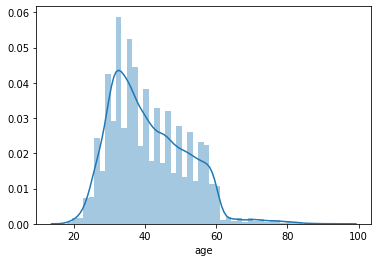

In [13]:
sns.distplot(train['age'])
plt.show()

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

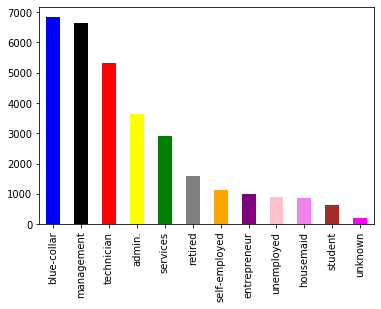

In [14]:
train['job'].value_counts().plot.bar(color = ['blue','black','red','yellow','green','grey','orange','purple','pink','violet','brown','magenta'])
plt.show()

We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. Now, let's also look at how many clients have default history.

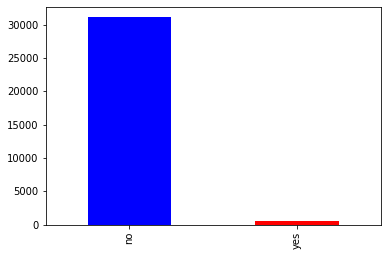

In [15]:
train['default'].value_counts().plot.bar(color = ['blue','red'])
plt.show()

More than 90% of the clients have no default history.

Tabular analysis of continous variables in train dataset.

In [16]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Tabular analysis of continous variables in test dataset.

In [17]:
test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


Now we will explore job and default variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

## Bivariate Analysis

Bivariate analysis of jobs and subscribed.

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


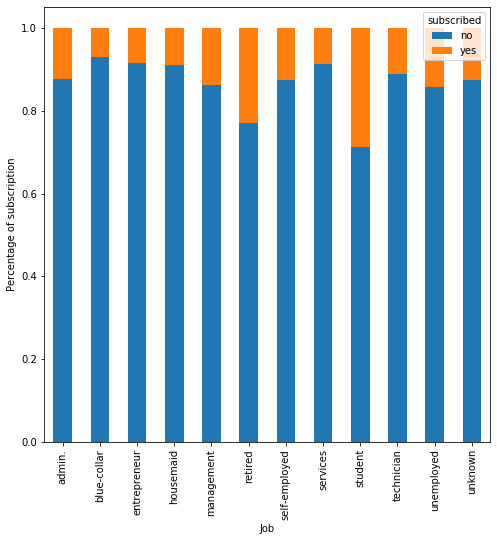

In [18]:
print(pd.crosstab(train['job'],train['subscribed']))

# draw stacked bar graph
j = pd.crosstab(train['job'],train['subscribed'])
j.div(j.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage of subscription')
plt.show()

We can infer from the given graph that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

Bivariate analysis of default and subscribed.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage of subscription')

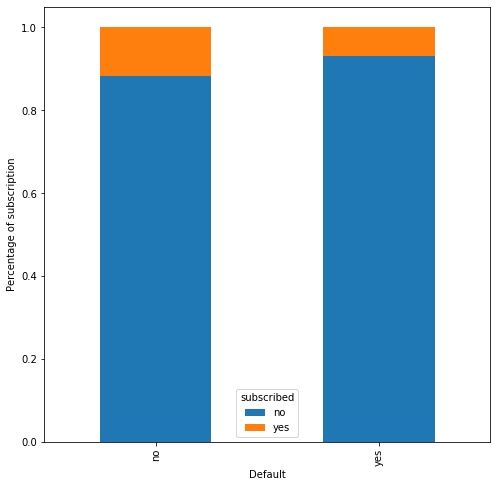

In [19]:
print(pd.crosstab(train['default'],train['subscribed']))

d = pd.crosstab(train['default'],train['subscribed'])
d.div(d.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Default')
plt.ylabel('Percentage of subscription')

We can infer from the given graph that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [20]:
# target variable conversion
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

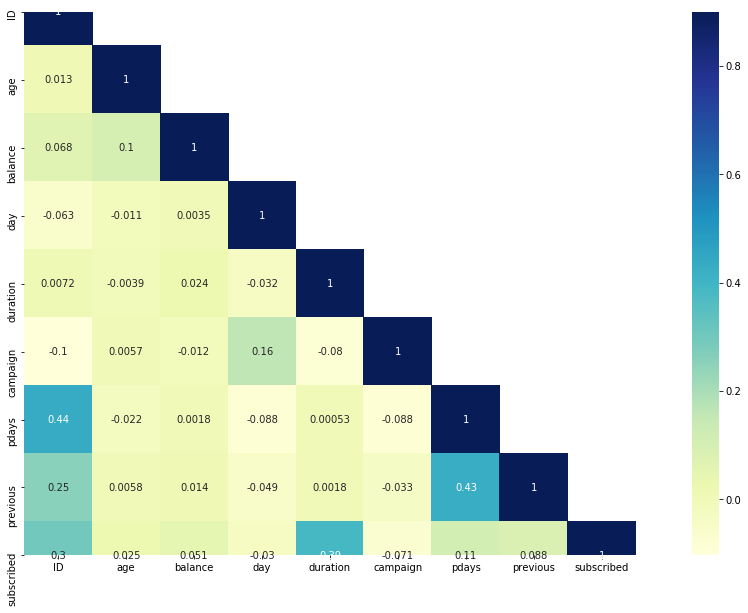

In [21]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")
plt.show()

We can infer that duration of the call is highly correlated with the target variable. The reason can be that if the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

# Missing Value Analysis

In [22]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset. 

Next, we will see any outliers in continous data.

# Outlier Detection

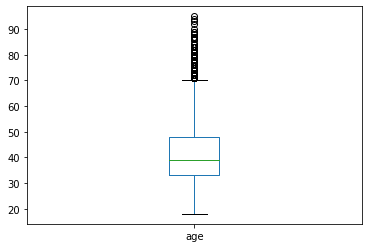

In [23]:
# for age variable
train['age'].plot.box()
plt.show()

Here we can see people above age 70 to 90, i.e. old people are being shown as outliers which means that they are very less in number.

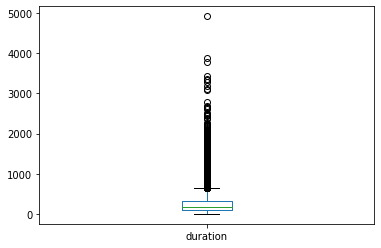

In [24]:
# for duration variable
train['duration'].plot.box()
plt.show()

Here we can see that most of the people tend to spend less time on call durations as we can see from above graphs that very few people have actually subscribed and people who subcribe only has tendency to spend more time on calls.

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

## Model Building

Drop subscribed variable from train dataset and assign it to target variable.

In [25]:
target = train['subscribed']
train = train.drop('subscribed',axis = 1)
train = train.drop('ID',axis = 1)
ID = test['ID'] 
test = test.drop('ID',axis=1)

Get dummies of categorical variables in train datasetn and test dataset.

In [26]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

# applying dummies on the test dataset
test = pd.get_dummies(test)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set. 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=1)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# defining the logistic regression model
model1 = LogisticRegression()

In [31]:
# fitting the model on  X_train and y_train
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# making prediction on the validation set
prediction = model1.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
# calculating the accuracy score
print("Validation data accuracy:",accuracy_score(y_val, prediction))
print("Train data accuracy:",accuracy_score(y_train,model1.predict(X_train)))

Validation data accuracy: 0.8965244865718799
Train data accuracy: 0.9023186001500968


We got an accuracy score of 89.65% on the validation dataset and 90.23% on the train dataset. Logistic regression has a linear decision boundary.We now need a model that can capture non linearity present in this dataset.We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [35]:
test_prediction = model1.predict(test)

Finally, we will save these predictions into a csv file. We can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [36]:
df1 = pd.DataFrame()

In [37]:
# creating a Business_Sourced column and saving the predictions in it
df1['ID'] = ID
df1['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [38]:
df1['subscribed'].replace(0,'no',inplace=True)
df1['subscribed'].replace(1,'yes',inplace=True)

Copy predictions to result1.csv file.

In [39]:
df1.to_csv('result1.csv', header=True, index=False)

Now you have the submission file with you. Follow these steps to generate your score:

1. Open the result2.csv file.
2. Copy the values in the subscribed column and paste them in the subscribed column of solution_checker1.xlsx file.
3. We will see the accuracy of the model on test dataset under Your accuracy score column.

To increase accuracy lets try Decision Tree algorithm.

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [41]:
# defining the decision tree model with depth of 4
model2 = DecisionTreeClassifier(max_depth = 4, random_state = 1)

In [42]:
# fitting the decision tree model
model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [43]:
# making prediction on the validation set
predict = model2.predict(X_val)

In [44]:
# calculating the accuracy score
print("Validation data accuracy:",accuracy_score(y_val, predict))
print("Training data accuracy:",accuracy_score(y_train, model2.predict(X_train)))

Validation data accuracy: 0.8998420221169037
Training data accuracy: 0.9029900857131572


We got an accuracy of around 89.98% on the validation set and 90.29% on train dataset. Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

Now we will make decision tree based on the model constructed by us just now.

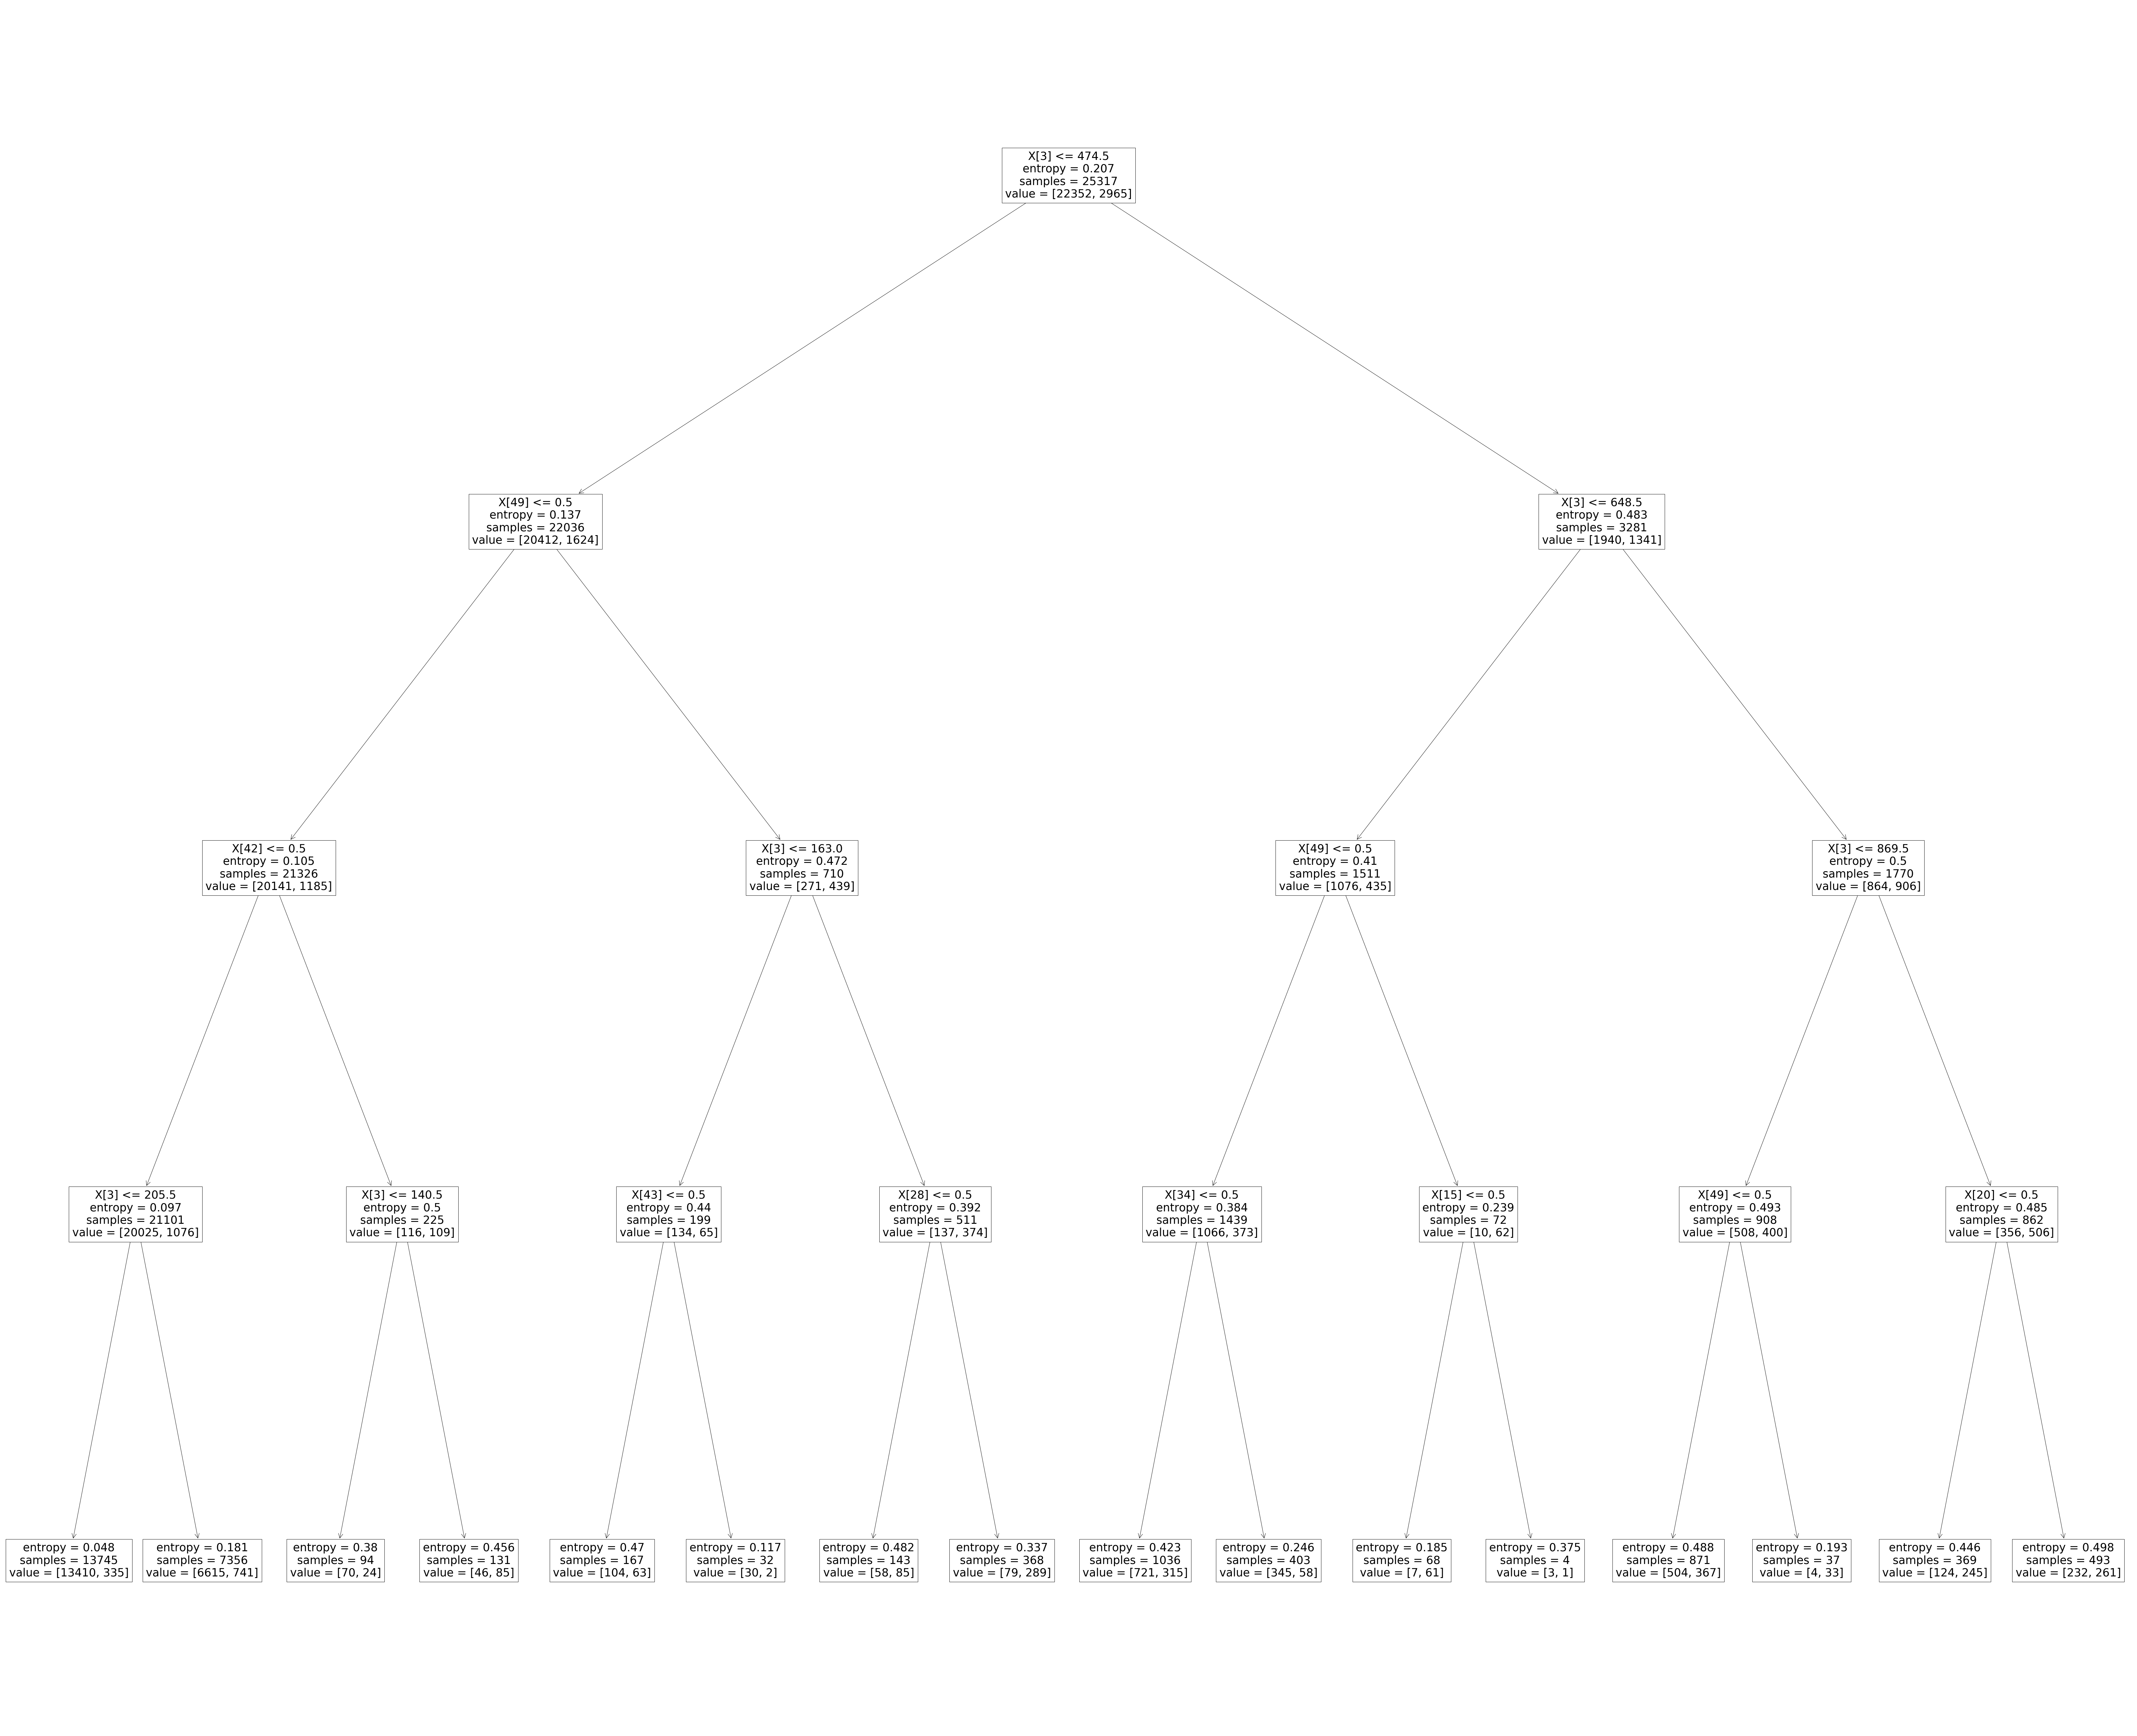

In [45]:
fig,ax= plt.subplots()
fig.set_size_inches(120,100)
plot_tree(model2)
plt.show()

In [46]:
test_prediction = model2.predict(test)

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [47]:
df2 = pd.DataFrame()

In [48]:
# creating a Business_Sourced column and saving the predictions in it
df2['ID'] = ID
df2['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [49]:
df2['subscribed'].replace(0,'no',inplace=True)
df2['subscribed'].replace(1,'yes',inplace=True)

Copy predictions to result2.csv file.

In [50]:
df2.to_csv('result2.csv', header=True, index=False)

Now you have the submission file with you. Follow these steps to generate your score:
1. Open the result2.csv file.
2. Copy the values in the subscribed column and paste them in the subscribed column of solution_checker2.xlsx file.
3. We will see the accuracy of the model on test dataset under Your accuracy score column.

From test accuracy column of both models in solution _checker.xlsx for each model we have following test accuracies for each method:
1. Logistic regression: From solution_checker1.xlsx we get test accuracy = 90.4%
2. Decision tree classifier: From solution_checker2.xlsx we get test accuracy = 90.23%

As we can see train and validation dataset accuracy doesn't differ much (Decision Tree Classifier has little bit more accuracy as compared to Logistic Regression) because as there is very little non-linearity in data.

But test accuracy instead of increasing decreases in test data set. We have used hyperparameters in decision tree classifier showing maximum test accuracy. It may be due to over fitting of data.